# Introduction
Kindly make a duplicate(**File-> Save a copy in Drive**) this notebook and rename it (xAutoML_2022_BO_firstname_lastname.ipynb).

# Session objectives




*   What is Bayesian optimization?

*   Discovering how to implement Bayesian optimization from the scratch.



# Setup

In [1]:
# your wonderful Python  packages :)
import pandas as pd
import numpy as np
import math
from scipy import stats
from scipy.stats import norm
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_rand

# visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# import urllib.request
import requests

# from sklearn
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.gaussian_process import GaussianProcessRegressor


# for ignoring the warnings massages.
import warnings
warnings.filterwarnings("ignore")

# visible plot outputs and save them in the notebook.
%matplotlib inline

# List of homeworks


1. Fill the missing cells, if any - 0 points
2. Replace BayesianRidge  with GaussianProcessRegressor and use it as surrogate function - 1.5 points
3. Replace BayesianRidge with RandomForestRegressor and as surrogate function - 1.5 points
4. Implement Expected Improvement (EI) and use it as acquisition Function - 1.5 points
5. Implement Lower/Upper confidence Bounds (LCB/UCB) and use it acquisition Function - 1.5 point


**P.S: for some of the above tasks, you may need to add more cells. please add all extra cells at the end of the notebook. It is also *acceptable* to simply replace and change the command on the current cells.**

# What is Bayesian optimization (BO)?

Lets have a dicussion about BO!

Bayesian optimization is basically a probability model that aims to learn an expensive objective function by learning from previous observations. It has two exceptionally important functionalities: surrogate model and acquisition function.

# BO Implementation
To implement BO, we would like ask you frist read this great article(https://machinelearningmastery.com/what-is-bayesian-optimization/) and then complete the following step to do the same but instead of using GaussianProcessRegressor, You need apply BayesianRidge as a surrogate model.

## Create an Objective function

In [2]:
# let us define an objective function! In the real world we don't know much about the objective function.
def objective(x,noise=0):
# Don't change the noise!
  noise = np.random.normal(loc=0, scale=noise)
  return (x**2 * math.sin(5 * math.pi * x)**6.0) + noise

In [3]:
# Create a sample of the domain [0,1]
X = np.arange(0, 1, 0.01)
X.shape

(100,)

In [4]:
# sample y
y = np.asarray([objective(x) for x in X])
# sample y + noise
NOISE=0.13490408996846922
y_noise = np.asarray([objective(x,NOISE) for x in X])


In [5]:
# What is the best result
index = np.argmax(y)
print('Optima: x=%.3f, y=%.3f' % (X[index], y[index]))


Optima: x=0.900, y=0.810


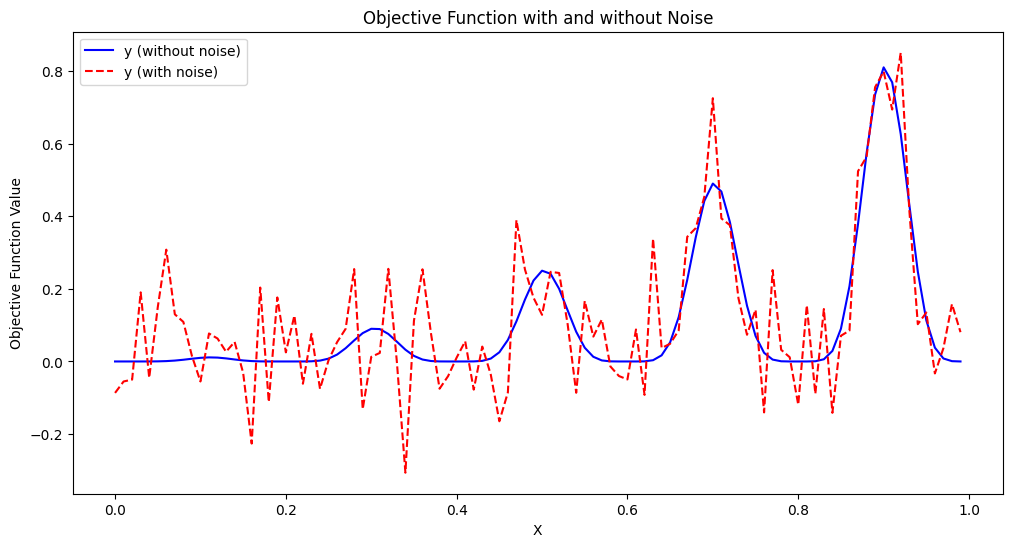

In [6]:
# [Start your code here]

# Create a new figure and set the size
plt.figure(figsize=(12, 6))

# plot y
plt.plot(X, y, label='y (without noise)', color='blue')

# plot y_noise
plt.plot(X, y_noise, label='y (with noise)', color='red', linestyle='dashed')

# Add a legend to the plot
plt.legend()

# Add title and labels to the axes
plt.title('Objective Function with and without Noise')
plt.xlabel('X')
plt.ylabel('Objective Function Value')

# show the plot
plt.show()

# [End your code here]

## Surrogate function
For this part, we will use Bayesian Ridge Regression for creating our surrogate function.

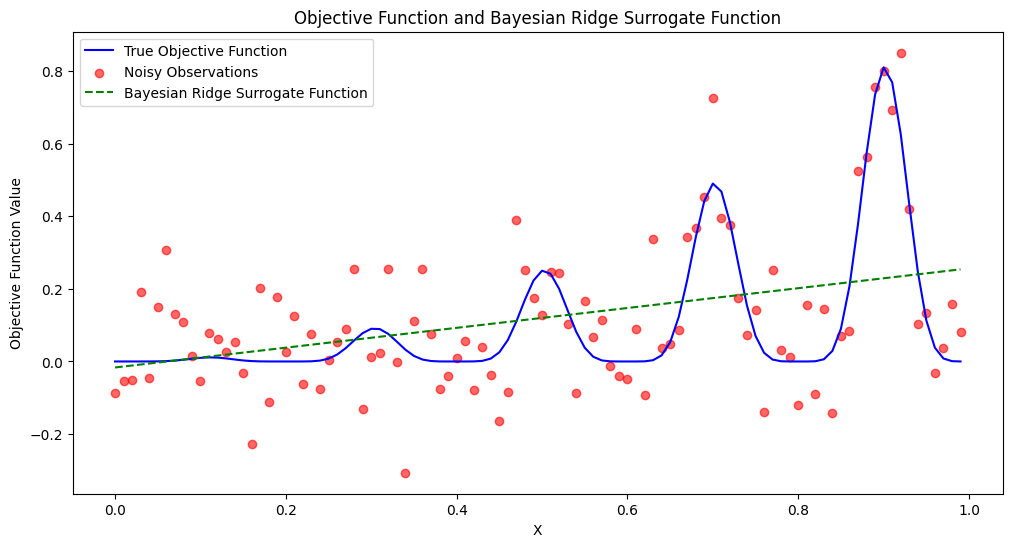

In [7]:
from sklearn.linear_model import BayesianRidge

# [Start your code here]

# Reshape X for compatibility with the model
X_reshaped = X.reshape(-1, 1)

# Create a Bayesian Ridge Regression model
bayesian_model = BayesianRidge()

# Train the model using the data with noise, as the surrogate should approximate the true objective function
bayesian_model.fit(X_reshaped, y_noise)

# Predict y values using the trained model
y_pred = bayesian_model.predict(X_reshaped)

# Create a new figure for plotting
plt.figure(figsize=(12, 6))

# Plot the true objective function
plt.plot(X, y, label='True Objective Function', color='blue')

# Plot the noisy observations
plt.scatter(X, y_noise, color='red', label='Noisy Observations', alpha=0.6)

# Plot the surrogate function
plt.plot(X, y_pred, label='Bayesian Ridge Surrogate Function', color='green', linestyle='dashed')

# Add a legend to the plot
plt.legend()

# Add title and labels to the axes
plt.title('Objective Function and Bayesian Ridge Surrogate Function')
plt.xlabel('X')
plt.ylabel('Objective Function Value')

# Show the plot
plt.show()

# [End your code here]

# Replace BayesianRidge  with GaussianProcessRegressor and use it as surrogate function  - 1.5 points

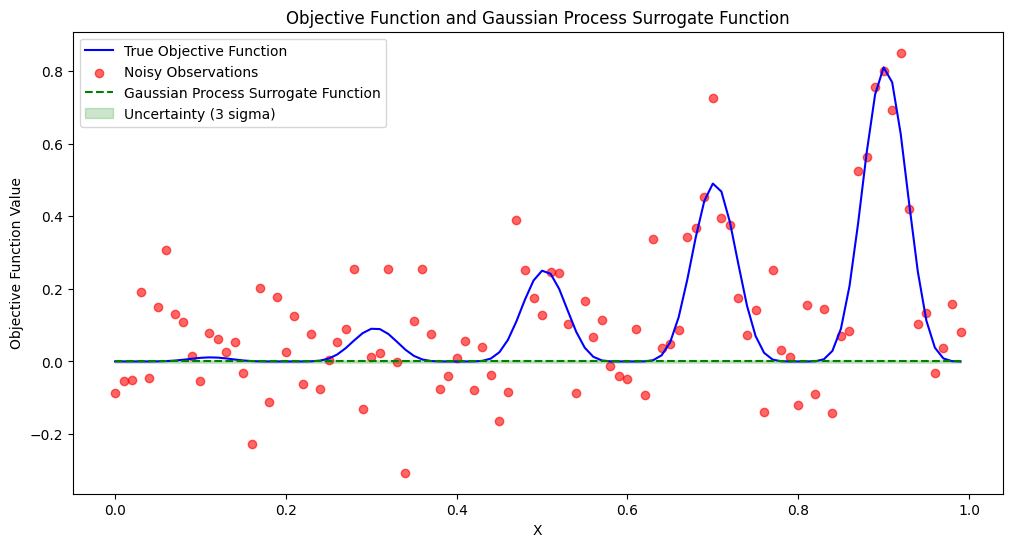

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# [Start your code here]

# Reshape X for compatibility with the model
X_reshaped = X.reshape(-1, 1)

# Kernel for the Gaussian Process
# The choice of kernel significantly influences the performance of the GPR, and it's often problem-specific.
# Here, we're using a common combination of Radial Basis Function (RBF) also known as the "squared exponential" kernel,
# and a constant term (C). You might need to tune these parameters or choose a different kernel depending on your specific problem.
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

# Create a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=y_noise**2)

# Train the model using the data with noise
gp.fit(X_reshaped, y_noise)

# Predict y values using the trained model
y_pred, sigma = gp.predict(X_reshaped, return_std=True)

# Create a new figure for plotting
plt.figure(figsize=(12, 6))

# Plot the true objective function
plt.plot(X, y, label='True Objective Function', color='blue')

# Plot the noisy observations
plt.scatter(X, y_noise, color='red', label='Noisy Observations', alpha=0.6)

# Plot the surrogate function
plt.plot(X, y_pred, label='Gaussian Process Surrogate Function', color='green', linestyle='dashed')

# Plot the uncertainty (3 sigma)
plt.fill_between(X, y_pred - 3*sigma, y_pred + 3*sigma, color='green', alpha=0.2, label='Uncertainty (3 sigma)')

# Add a legend to the plot
plt.legend()

# Add title and labels to the axes
plt.title('Objective Function and Gaussian Process Surrogate Function')
plt.xlabel('X')
plt.ylabel('Objective Function Value')

# Show the plot
plt.show()

# [End your code here]

## Replace BayesianRidge with RandomForestRegressor and use it as surrogate function - 1.5 points

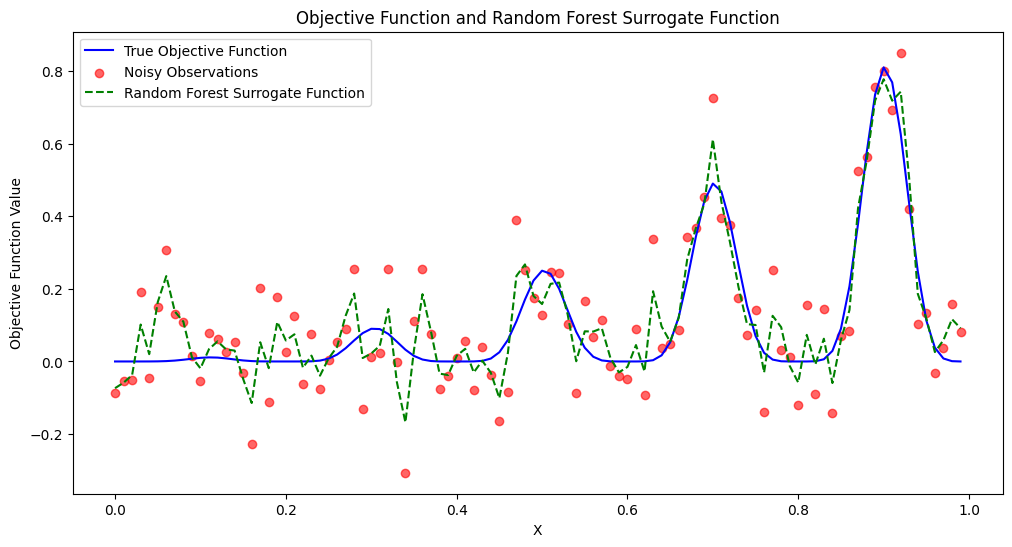

In [10]:
from sklearn.ensemble import RandomForestRegressor

# [Start your code here]

# Reshape X for compatibility with the model
X_reshaped = X.reshape(-1, 1)

# Create a Random Forest Regressor model
# You might want to tune these parameters depending on your specific problem.
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the data with noise
rf.fit(X_reshaped, y_noise)

# Predict y values using the trained model
y_pred = rf.predict(X_reshaped)

# Create a new figure for plotting
plt.figure(figsize=(12, 6))

# Plot the true objective function
plt.plot(X, y, label='True Objective Function', color='blue')

# Plot the noisy observations
plt.scatter(X, y_noise, color='red', label='Noisy Observations', alpha=0.6)

# Plot the surrogate function
plt.plot(X, y_pred, label='Random Forest Surrogate Function', color='green', linestyle='dashed')

# Add a legend to the plot
plt.legend()

# Add title and labels to the axes
plt.title('Objective Function and Random Forest Surrogate Function')
plt.xlabel('X')
plt.ylabel('Objective Function Value')

# Show the plot
plt.show()

# [End your code here]

In [26]:
def surrogate_model(model, X):
    # [Start your code here]

    # Determine the number of features the model was trained on
    n_features = model.n_features_in_

    # If the model was trained on a Vandermonde matrix (indicated by n_features > 1),
    # we need to transform X accordingly before making predictions
    if n_features > 1:
        # Flatten X to ensure it's a one-dimensional array before passing to np.vander
        X = X.flatten()
        X = np.vander(X, n_features)

    # Use the provided model to make predictions
    y_pred = model.predict(X)

    # Check if the model provides standard deviation (uncertainty) along with predictions
    # This is typical for Gaussian processes but not for all model types.
    try:
        _, std_dev = model.predict(X, return_std=True)
    except TypeError:
        std_dev = None  # If the model doesn't support return_std, we set std_dev to None

    return y_pred, std_dev

    # [End your code here]

In [27]:
# plot real data + surrogate model
def model_plot(X, y, model):
	# scatter plot for real objective function
	plt.scatter(X, y)
	# line plot of surrogate function across domain
	Xsamples = np.asarray(np.arange(0, 1, 0.02))
	# Xsamples = Xsamples.reshape(len(Xsamples), 1)
	ysamples, _ = surrogate_model(model, Xsamples)
	plt.plot(Xsamples, ysamples)
	# show the plot
	plt.show()

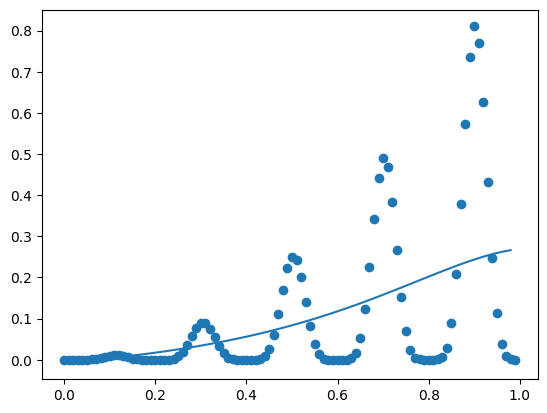

In [28]:
# fit the model
bayesian_model.fit(np.vander(X, 9), y)
# plot the surrogate function
model_plot(X, y, bayesian_model)


## Defining a acquisition Function
Now we must define the acquisition function. There are several options such as:
* Probability of Improvement (PI).
* Expected Improvement (EI).
* Lower Confidence Bound (LCB).

In [29]:
from scipy.stats import norm

def acquisition_PI(X, Xsamples, model):
    # [Start your code here]

    # Ensure Xsamples is a 2D array
    Xsamples = Xsamples.reshape(-1, 1)

    # Compute the best surrogate score discovered so far
    y_pred, _ = surrogate_model(model, X)
    best_surrogate_score = np.max(y_pred)

    # Compute mean and stdev via surrogate function
    mu, sigma = surrogate_model(model, Xsamples)

    # If the model doesn't support return_std (sigma is None), we cannot compute PI
    if sigma is None:
        raise ValueError("Model must support computation of standard deviations for PI acquisition function")

    # Calculate the Z value for the standard score (also called standard normal deviate)
    Z = (mu - best_surrogate_score - 0.01) / sigma  # the 0.01 is for a small trade-off between exploration and exploitation

    # Calculate the probability of improvement
    probs = norm.cdf(Z)

    # [End your code here]
    return probs

The probability of improvement was implemented in the previous function. Now you need to implement 1.  Expected Improvement (EI) 2. Lower Confidence Bound

## Implement Expected Improvement (EI) - 1.5 points

In [30]:
def acquisition_EI(X, Xsamples, model):
    # [start to write your code here]

    # Ensure Xsamples is a 2D array
    Xsamples = Xsamples.reshape(-1, 1)

    # Compute the best surrogate score discovered so far
    y_pred, _ = surrogate_model(model, X)
    best_surrogate_score = np.max(y_pred)

    # Compute mean and stdev via surrogate function
    mu, sigma = surrogate_model(model, Xsamples)

    # If the model doesn't support return_std (sigma is None), we cannot compute EI
    if sigma is None:
        raise ValueError("Model must support computation of standard deviations for EI acquisition function")

    # Calculate the improvement
    improvement = mu - best_surrogate_score - 0.01  # the 0.01 is for a small trade-off between exploration and exploitation

    # Calculate the Z value
    Z = improvement / sigma

    # Calculate the expected improvement
    ei = improvement * norm.cdf(Z) + sigma * norm.pdf(Z)
    ei[sigma == 0.0] = 0.0  # if sigma is zero, ei is zero

    # [end to write your code]
    return ei

## Implement Lower/Upper confidence Bounds (LCB/UCB) - 1.5 point

In [31]:
def acquisition_LCB(X, Xsamples, model):
    # [start to write your code here]

    # Ensure Xsamples is a 2D array
    Xsamples = Xsamples.reshape(-1, 1)

    # Compute mean and stdev via surrogate function
    mu, sigma = surrogate_model(model, Xsamples)

    # If the model doesn't support return_std (sigma is None), we cannot compute LCB
    if sigma is None:
        raise ValueError("Model must support computation of standard deviations for LCB acquisition function")

    # Calculate the Lower Confidence Bound
    # The 'kappa' parameter controls the balance between exploitation and exploration
    kappa = 2.0
    lcb = mu - kappa * sigma

    # [end to write your code]
    return lcb

In [24]:
# Next, we must define a strategy for sampling the surrogate function.
def opt_acquisition(X, y, model):
	# random search, generate random samples
	Xsamples = np.random.random(100)
	# Xsamples = Xsamples.reshape(len(Xsamples), 1)
	# calculate the acquisition function for each sample
	#
	scores = acquisition_PI(X, Xsamples, model)
	# locate the index of the largest scores
	ix = np.argmax(scores)
	return Xsamples[ix]

## Running The BO process(for bayesianridge_model,  )




In [33]:
# We must execute the entire BO sequentially, and then we choose 500 times. You may modify it and rerun it to see what the difference is.
# this code should be runnable for different acquisition functions and Surrogate functions
for i in range(500):
	# select the next point to sample
	x = opt_acquisition(X, y, bayesian_model)
	# sample the point
	actual = objective(x)
	# summarize the finding for our own reporting
	est, _ = surrogate_model(bayesian_model, x)
	print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
	# add the data to the dataset
	X = np.append(X, x)
	y = np.append(y, actual)
	# update the model
	bayesian_model.fit(np.vander(X, 9), y)

>x=0.992, f()=0.268198, actual=0.000
>x=0.914, f()=0.233466, actual=0.721
>x=0.937, f()=0.255362, actual=0.298
>x=0.933, f()=0.257318, actual=0.370
>x=0.953, f()=0.263464, actual=0.089
>x=0.930, f()=0.253838, actual=0.427
>x=0.938, f()=0.260992, actual=0.286
>x=0.938, f()=0.262040, actual=0.273
>x=0.939, f()=0.262463, actual=0.260
>x=0.926, f()=0.262180, actual=0.506
>x=0.937, f()=0.270853, actual=0.303
>x=0.938, f()=0.272019, actual=0.277
>x=0.950, f()=0.271670, actual=0.112
>x=0.922, f()=0.266752, actual=0.599
>x=0.925, f()=0.276457, actual=0.541
>x=0.926, f()=0.284199, actual=0.514
>x=0.921, f()=0.290876, actual=0.607
>x=0.917, f()=0.300059, actual=0.669
>x=0.915, f()=0.311318, actual=0.713
>x=0.900, f()=0.324460, actual=0.810
>x=0.878, f()=0.387051, actual=0.538
>x=0.892, f()=0.395371, actual=0.755
>x=0.891, f()=0.412612, actual=0.745
>x=0.875, f()=0.446461, actual=0.479
>x=0.887, f()=0.453030, actual=0.695
>x=0.889, f()=0.462061, actual=0.717
>x=0.888, f()=0.470822, actual=0.703
>

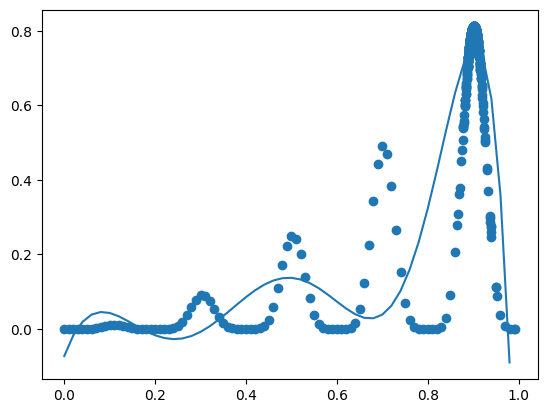

In [34]:
# plot all samples and the final surrogate function
model_plot(X, y, bayesian_model)

### What is your best outcome from running the BO?

In [35]:
# best result
index = np.argmax(y)
print('Best Result: x=%.3f, y=%.3f' % (X[index], y[index]))

Best Result: x=0.902, y=0.811


# Share your thoughts and provide us feedback regarding to this notebook.(Optional)


## Write your feedback here:

# <font color='green'> Finished! </font>



